# 0. About 
This dataset contains about 10 years of daily weather observations from numerous Autralian weather stations.   

RainTomorriow is the target variable to predict. It means - did it rain the next day, Yes or No?   
This column is Yes if the rain for that day wa 1mm or more.   

**features**   
- Date: the date of observation   
- Location: the common name of the location of the weather station   
- MinTemp: the minimum temperature in degrees celsius   
- Rainfall: the amount of rainfall recorded for the day in mm
- Evaporation: the so-called class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine: the number of hours of the bright sunshine in the day   
- WindGustDir: the prediction of the strongest wind gust in the 24 hours to midnight   
- WindGustSpeed: the speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am/3pm: direction of the wind at 9am/3pm
- WindSpeed9am/3pm: wind speed (km/hr) averaged over 10 minutes prior to 9am/3pm
- Humidity9am/3pm: humidity (percent) at 9am/3pm
- Pressure9am/3pm: atmospheric pressure (hpa) reduced to mean sea level at 9am/3pm
- Cloud9am/3pm: fraction of sky obscured by cloud at 9am/3pm. this is measured in "oktas", which are a unit of eights. it records how many
- Temp9am/3pm: temperature (degrees C) at 9am/3pm
- RainToday: Boolean - 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow: the amount of next day rain in mm. used to create response variable RainTomorrow. a kind of measure of the "risk"

# 1. Load Data

In [1]:
import pandas as pd
df = pd.read_csv('./weatherAUS.csv', parse_dates=['Date'])     # datetime object로 'Date' 불러오기

import warnings
warnings.filterwarnings('ignore')     # 오류 메세지 안뜨게 하기

In [2]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

# 2. Missing Values
(1) 결측값을 특정 값으로 채우기   
data_df['MaxTemp'].fillna('missing value')   

(2) 결측값을 앞 혹은 뒷방향 데이터로 채우기   
data_df['MaxTemp'].fillna(method='ffill' or 'pad')   
data_df['MaxTemp'].fillna(method='bfill' or 'backfill')

(3) 결측값을 앞 혹은 뒷방향으로 채우는 횟수를 제한하기   
data_df['MaxTemp'].fillna(method='ffill', limit=1)   

(4) 결측값을 변수별 평균으로 대체하기   
data_df['MaxTemp'].fillna(data_df.mean()['MaxTemp'])

(5) 결측값을 다른 변수의 값으로 대체하기 

(6) 결측값을 가진 행 제거

(7) 변수 종류에 따라 수치형: 일정값 이하면 삭제하기 / 범주형: 최빈값 등으로 대체 

In [8]:
df.isnull().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [9]:
# 결측률 확인
missing_total = df.isnull().sum().sort_values(ascending=False)
missing_rate = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([missing_total, missing_rate], axis=1, keys=['Missing Total', 'Missing Rate'])
missing_data

,Missing Total,Missing Rate
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


In [10]:
# 높은 결측률의 칼럼 제거
drop_columns = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']
df = df.drop(drop_columns, axis=1)

df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [11]:
# 결측값을 가진 행 제거
df = df.dropna()

df.isnull().any()     # any(): 값이 하나라도 존재하면 True

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

# 3. About Features

In [12]:
# Year, Month, Day 컬럼 추가
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)     # 삭제 안할시 상관계수가 엄청 높아질 수 있음 

df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       112925 non-null  object 
 1   MinTemp        112925 non-null  float64
 2   MaxTemp        112925 non-null  float64
 3   Rainfall       112925 non-null  float64
 4   WindGustDir    112925 non-null  object 
 5   WindGustSpeed  112925 non-null  float64
 6   WindDir9am     112925 non-null  object 
 7   WindDir3pm     112925 non-null  object 
 8   WindSpeed9am   112925 non-null  float64
 9   WindSpeed3pm   112925 non-null  float64
 10  Humidity9am    112925 non-null  float64
 11  Humidity3pm    112925 non-null  float64
 12  Pressure9am    112925 non-null  float64
 13  Pressure3pm    112925 non-null  float64
 14  Temp9am        112925 non-null  float64
 15  Temp3pm        112925 non-null  float64
 16  RainToday      112925 non-null  object 
 17  RainTomorrow   112925 non-nul

In [14]:
# 수치형과 문자형 칼럼 분리
numeric_category = list(df.select_dtypes(['float64']).columns)
object_category = list(df.select_dtypes(['object','int64']).columns)

print('수치형 columns: ', numeric_category)
print('문자형 columns: ', object_category)

수치형 columns:  ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
문자형 columns:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day']


In [15]:
df[numeric_category].head(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7


In [16]:
df[object_category].head(5)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,W,W,WNW,No,No,2008,12,1
1,Albury,WNW,NNW,WSW,No,No,2008,12,2
2,Albury,WSW,W,WSW,No,No,2008,12,3
3,Albury,NE,SE,E,No,No,2008,12,4
4,Albury,W,ENE,NW,No,No,2008,12,5


In [17]:
# 불린값 인코당
df['RainToday'] = df['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

# 4. Visualization

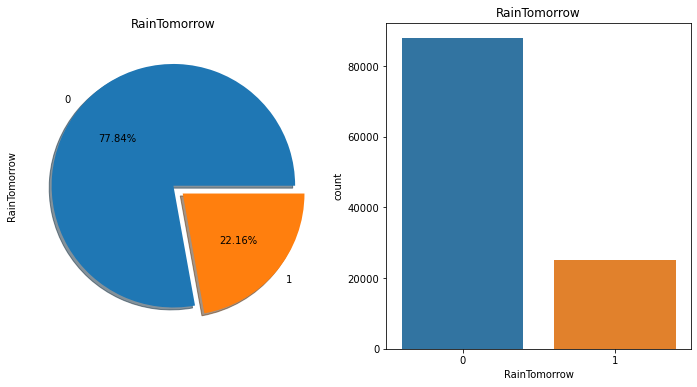

In [18]:
# 타겟값 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(12,6))
df['RainTomorrow'].value_counts().plot.pie(autopct="%1.2f%%", explode=[0,0.1], ax=ax[0], shadow=True)
ax[0].set_title('RainTomorrow')

sns.countplot('RainTomorrow', data=df, ax=ax[1])
ax[1].set_title('RainTomorrow')

plt.show()

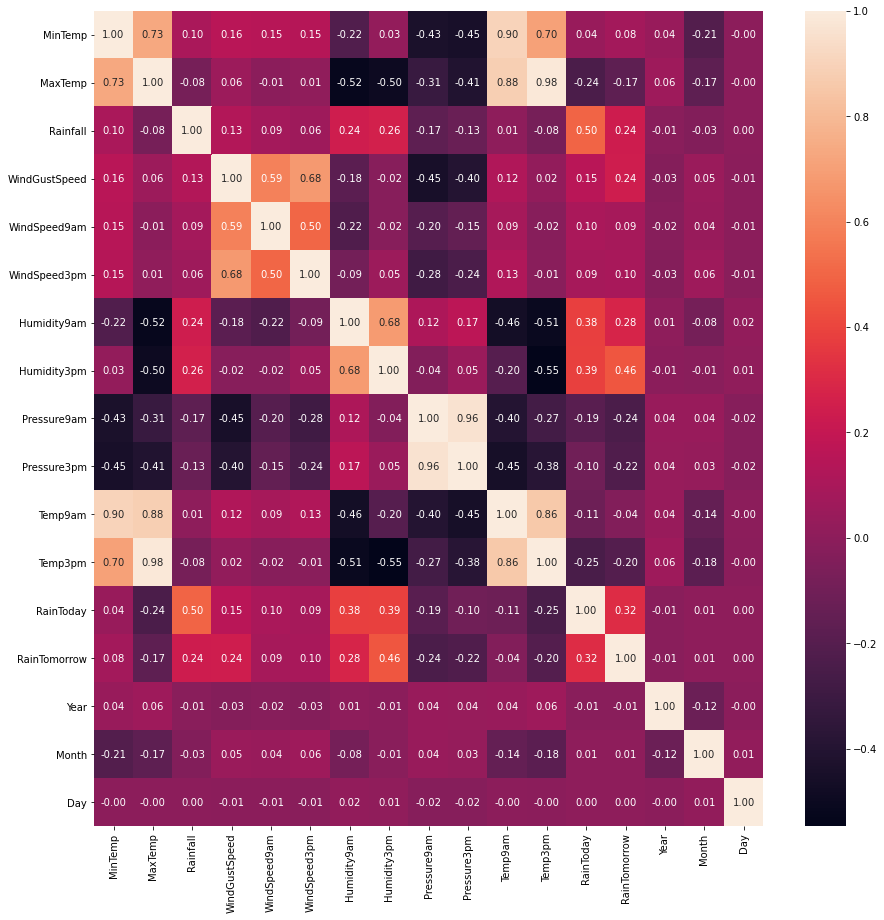

In [19]:
# 변수 간 상관관계 시각화
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=corr, annot=True, fmt='.2f')
plt.show()

# 5. EDA
> **1) Location**

In [20]:
df.Location.value_counts()     # 결측치 수에 따라 어떻게 처리할지 결정해야 함 

Darwin              3117
Hobart              3089
Perth               3037
Brisbane            3020
MelbourneAirport    2934
SydneyAirport       2929
PerthAirport        2923
Cairns              2899
Mildura             2897
MountGambier        2886
Woomera             2886
Townsville          2884
NorfolkIsland       2864
Ballarat            2854
GoldCoast           2821
Portland            2820
Cobar               2804
WaggaWagga          2800
Nuriootpa           2790
NorahHead           2785
Wollongong          2767
AliceSprings        2744
Adelaide            2740
Sale                2735
Watsonia            2735
Canberra            2725
Bendigo             2713
Moree               2629
CoffsHarbour        2529
Walpole             2502
PearceRAAF          2458
Albury              2440
BadgerysCreek       2334
Witchcliffe         2318
Tuggeranong         2316
Dartmoor            2294
Sydney              2259
Melbourne           2233
Williamtown         2195
Richmond            2048


In [21]:
df.Location.nunique()     # unique한 개수 나타내기

44

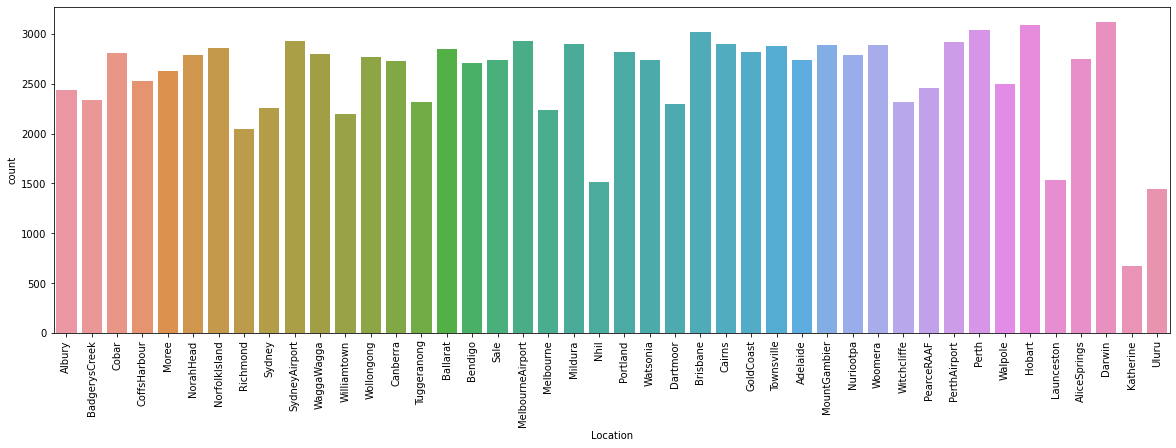

In [22]:
plt.figure(figsize=(20,6))     # 새로운 figure 생성 및 크기 지정 
sns.countplot(x='Location', data=df)     # 변수 분포 countplot
plt.xticks(size=10, rotation='vertical')     # x축 눈금 위치 및 텍스트 회전 방향
plt.show()

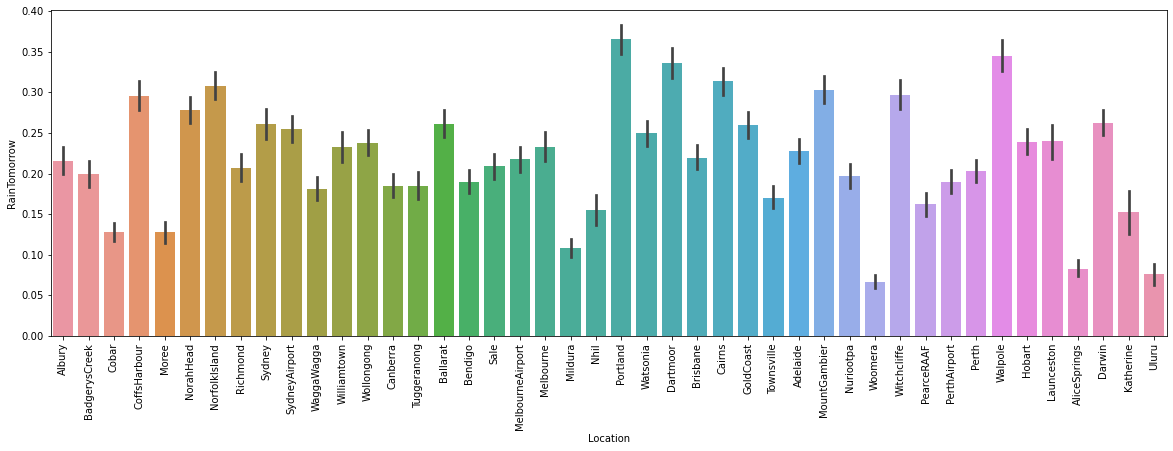

In [23]:
plt.figure(figsize=(20,6))
sns.barplot(x='Location', y='RainTomorrow', data=df)     # x와 y의 관계 barplot, 검은색 긴 막대는 오차 막대 
plt.xticks(size=10, rotation='vertical')
plt.show()

> **2) WindGustDir**

In [24]:
df.WindGustDir.value_counts()

W      8380
SE     8087
E      7835
SSE    7728
S      7728
N      7679
WSW    7629
SW     7575
SSW    7379
ENE    6759
WNW    6742
NW     6404
ESE    6223
NE     6053
NNE    5490
NNW    5234
Name: WindGustDir, dtype: int64

In [25]:
df.WindGustDir.nunique()

16

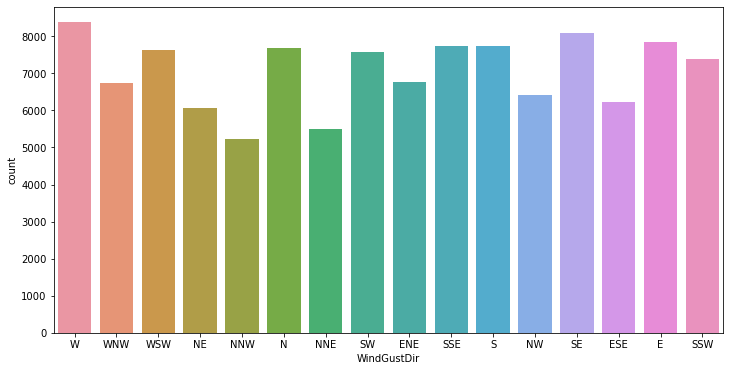

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='WindGustDir', data=df)
plt.show()

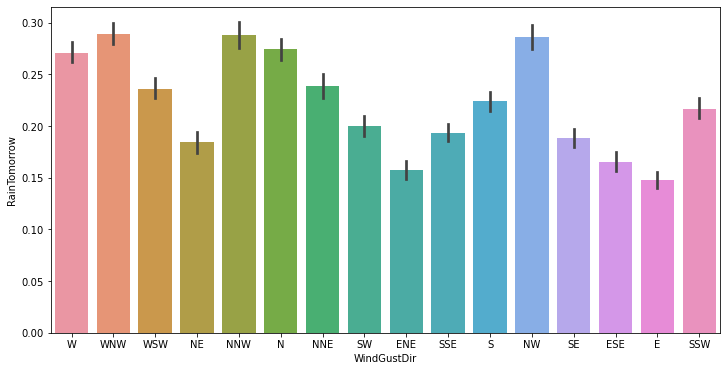

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='WindGustDir', y='RainTomorrow', data=df)
plt.show()

> **3) WindDir9am**

In [28]:
df.WindDir9am.value_counts()

N      9815
SSE    8122
E      7980
SE     7824
S      7516
SW     6979
NNE    6949
ENE    6858
ESE    6625
NW     6614
W      6608
NNW    6554
NE     6383
SSW    6261
WNW    5986
WSW    5851
Name: WindDir9am, dtype: int64

In [29]:
df.WindDir9am.nunique()

16

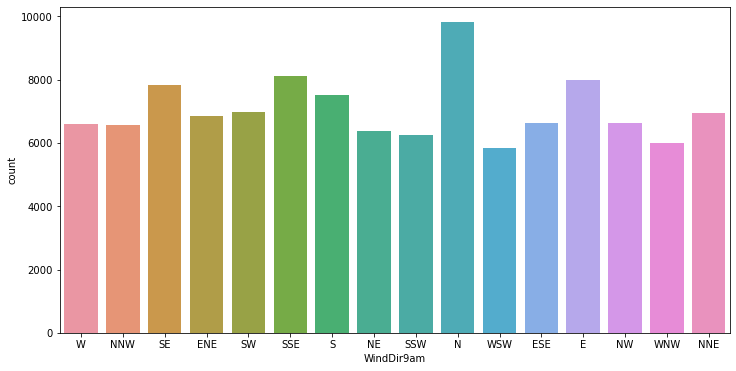

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x='WindDir9am', data=df)
plt.show()

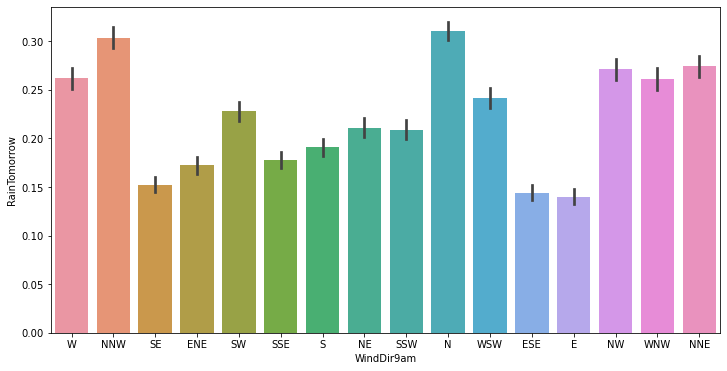

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='WindDir9am', y='RainTomorrow', data=df)
plt.show()

> **4) WindDir3pm**

In [32]:
df.WindDir3pm.value_counts()

SE     8325
S      8136
W      7948
SSE    7794
WSW    7772
SW     7656
N      7201
WNW    6933
ESE    6867
E      6717
SSW    6688
NE     6622
ENE    6526
NW     6384
NNW    6061
NNE    5295
Name: WindDir3pm, dtype: int64

In [33]:
df.WindDir3pm.nunique()

16

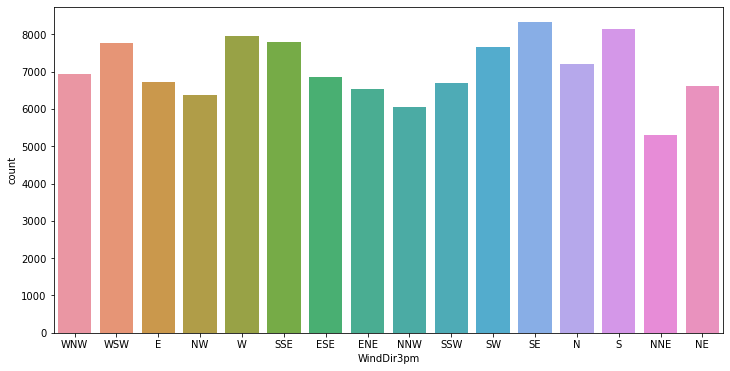

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x='WindDir3pm', data=df)
plt.show()

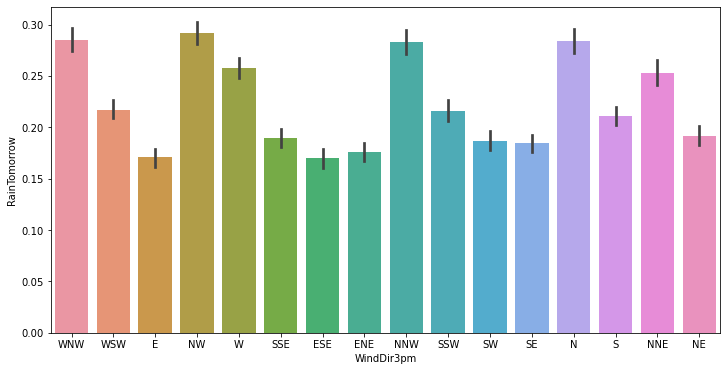

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x='WindDir3pm', y='RainTomorrow', data=df)
plt.show()

> **5) Month**

In [36]:
df.Month.value_counts()

1     10705
3     10251
5      9772
10     9694
11     9532
6      9231
9      9212
8      9154
4      8984
12     8934
7      8917
2      8539
Name: Month, dtype: int64

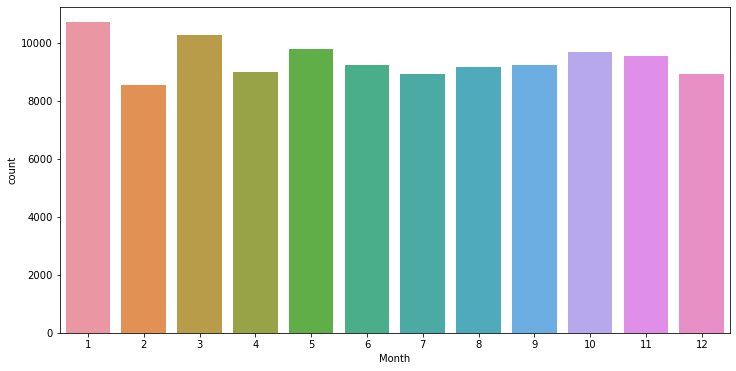

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x='Month', data=df)
plt.show()

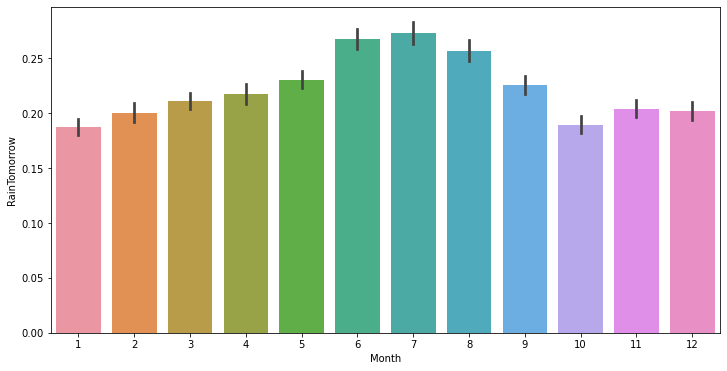

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='RainTomorrow', data=df)
plt.show()     # 여름에 강수 확률이 높음을 확인

> **6) RainToday**

<AxesSubplot:xlabel='RainToday', ylabel='RainTomorrow'>

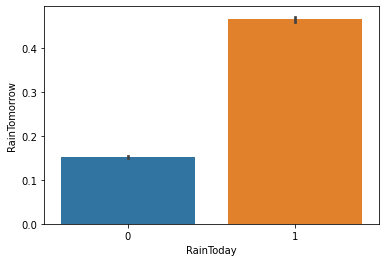

In [39]:
sns.barplot(x='RainToday', y='RainTomorrow', data=df)     # 내일 비가 올 확률은 오늘 비가 왔을 경우 더 높음을 확인